<a href="https://colab.research.google.com/github/IamAbhiKaushik/python-classes/blob/master/stock_market_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install matplotlib
!pip install mplfinance

In [ ]:
import yfinance as yf
import matplotlib.ticker as mticker
import mplfinance as mpf

stock = 'RELIANCE.NS'
data = yf.download(stock, start="2019-01-01", end="2021-01-01")
# data.head()

# mpf.plot(data[0: 28],type='candle',volume=True, figratio=(20,10),figscale=1, style='charles')

# print(len(data))
opens = data['Open']
highs = data['High']
lows = data['Low']
closes = data['Close']
indexes = data.index


record = dict()
total_profit = 0
def buy_sell(index, buy, stop_loss, sell, call):
    if call:
        # add stock in record dict
        record[index] = {'buy': buy, 'sell': sell, 'stop_loss': stop_loss}
        return int(opens[index+3])-int(closes[index])
        # print("buy option called.")
    else:
        # remove stock from record dict
        if index in record:
            NET += (sell-buy)
            del record[index]
            print(record)
def sell_all():
  total_profit = 0
  for i in range(0, len(data)):
    if (opens[i]-lows[i] <= 0.005*lows[i]) and (highs[i]-closes[i] <= 0.005*closes[i]) and (0.01*opens[i] < (closes[i]-opens[i]) <= 0.065*opens[i]):
      net_profit = buy_sell(i, highs[i], opens[i], highs[i]+(highs[i]-opens[i]), True)
      print(net_profit, total_profit)
      total_profit += net_profit
  return total_profit

a=sell_all()
print("ALL trades executed.")
print(a)
# print(record)

In [36]:
import yfinance as yf
import matplotlib.ticker as mticker
import mplfinance as mpf

stock = 'RELIANCE.NS'
MARGIN = 10
data = yf.download(stock, start="2019-01-01", end="2020-11-01")
#data.head()

# mpf.plot(data[230:240],type='candle',volume=True, figratio=(20,10),figscale=1, style='charles')

# print(len(data))
opens = data['Open']
highs = data['High']
lows = data['Low']
closes = data['Close']
indexes = data.index


record = dict()
total_profit = 0
def buy_sell(index, buy, stop_loss, sell, call):
    if call:
        # add stock in record dict
        record[index] = {'buy': buy, 'sell': sell, 'stop_loss': stop_loss}
        return int(opens[index+3])-int(closes[index])
        # print("buy option called.")
    else:
        # remove stock from record dict
        if index in record:
            NET += (sell-buy)
            del record[index]
            print(record)

def make_trade(i):
  if i >= len(data):
    return False, None
  stoploss = lows[i] + 1
  buy_point = opens[i+1] + 1
  sell_point = buy_point + MARGIN
  for j in range(i+1, len(data)):
    if opens[j] < stoploss:
      print(lows[j], highs[j], opens[j], stoploss, sell_point, i, j)
      return False, opens[j] - buy_point
    if sell_point < opens[j]:
      return True, opens[j] - buy_point 
    if lows[j] <= sell_point <= highs[j]:
      return True, MARGIN
    if lows[j] <= stoploss:
      print(lows[j], highs[j], opens[j], stoploss, sell_point, i, j)
      return False, (stoploss - buy_point)
  return False, None

def sell_all():
  total_trade = [0, 0, 0]
  total_profit = 0
  for i in range(0, len(data)):
    if (opens[i]-lows[i] <= 0.005*lows[i]) and (highs[i]-closes[i] <= 0.005*closes[i]) and (0.02*opens[i] < abs(closes[i]-opens[i]) <= 0.09*opens[i]):
      status, net_profit = make_trade(i)
      if status:
        total_trade[0] += 1
      else:
        if net_profit is None:
          total_trade[2] += 1
        else:
          total_trade[1] += 1

      total_profit += net_profit
      # net_profit = buy_sell(i, highs[i], opens[i], highs[i]+(highs[i]-opens[i]), True)
      print(net_profit, total_profit)
      # total_profit += net_profit
  return total_profit
  

a=sell_all()
print("ALL trades executed.")
print(a)
# # print(record)

[*********************100%***********************]  1 of 1 completed
10 10
10 20
10 30
10 40
10 50
10 60
10 70
10 80
10 90
10 100
1557.800048828125 1577.550048828125 1560.0999755859375 1572.800048828125 1626.0 234 236
-55.9000244140625 44.0999755859375
10 54.0999755859375
10 64.0999755859375
10 74.0999755859375
10 84.0999755859375
10 94.0999755859375
ALL trades executed.
94.0999755859375


[*********************100%***********************]  1 of 1 completed


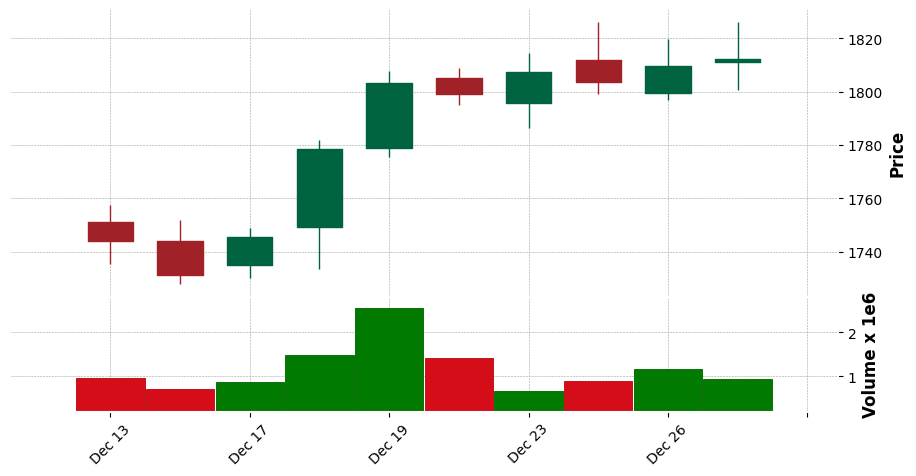

In [48]:
import yfinance as yf
import matplotlib.ticker as mticker
import mplfinance as mpf

# stock = 'RELIANCE.NS'
stock = 'ASIANPAINT.NS'
MARGIN = 10
data = yf.download(stock, start="2019-01-01", end="2020-11-01")
#data.head()

mpf.plot(data[230:240],type='candle',volume=True, figratio=(20,10),figscale=1, style='charles')

In [83]:
import yfinance as yf
import matplotlib.ticker as mticker
import mplfinance as mpf

# stock = 'ASIANPAINT.NS'
# stock = 'TITAN.NS'
# stock = 'ULTRACEMCO.NS'
stock = 'ADANIPORTS.NS'
MARGIN = 10
data = yf.download(stock, start="2020-01-01", end="2020-10-10")
#data.head()

# mpf.plot(data[230:240],type='candle',volume=True, figratio=(20,10),figscale=1, style='charles')

# print(len(data))
opens = data['Open']
highs = data['High']
lows = data['Low']
closes = data['Close']
indexes = data.index


record = dict()
total_profit = 0
def buy_sell(index, buy, stop_loss, sell, call):
    if call:
        # add stock in record dict
        record[index] = {'buy': buy, 'sell': sell, 'stop_loss': stop_loss}
        return int(opens[index+3])-int(closes[index])
        # print("buy option called.")
    else:
        # remove stock from record dict
        if index in record:
            NET += (sell-buy)
            del record[index]
            print(record)

def make_trade(i):
  if i > len(data)-2:
    return False, None
  stoploss = lows[i] + 1
  buy_point = opens[i+1] + 1
  # sell_point = buy_point + (highs[i]-lows[i])
  sell_point = buy_point + MARGIN
  for j in range(i+1, len(data)):
    if opens[j] < stoploss:
      print(lows[j], highs[j], opens[j], stoploss, sell_point, i, j)
      return False, opens[j] - buy_point
    if sell_point < opens[j]:
      return True, opens[j] - buy_point 
    if lows[j] <= sell_point <= highs[j]:
      return True, sell_point - buy_point
    if lows[j] <= stoploss:
      print(lows[j], highs[j], opens[j], stoploss, sell_point, i, j)
      return False, (stoploss - buy_point)
  return False, None

def sell_all():
  total_trade = [0, 0, 0]
  total_profit = 0
  for i in range(0, len(data)):
    if (opens[i]-lows[i] <= 0.01*lows[i]) and (highs[i]-closes[i] <= 0.01*closes[i]) and (0.02*opens[i] < abs(closes[i]-opens[i]) <= 0.09*opens[i]):
      status, net_profit = make_trade(i)
      if status:
        total_trade[0] += 1
      else:
        if net_profit is None:
          total_trade[2] += 1
        else:
          total_trade[1] += 1
      if net_profit is not None:
        total_profit = total_profit + net_profit 
      # net_profit = buy_sell(i, highs[i], opens[i], highs[i]+(highs[i]-opens[i]), True)
      print(net_profit, total_profit)
      # total_profit += net_profit
  print(total_trade)
  return total_profit
  

a=sell_all()
print("ALL trades executed.")
print(a)
# # print(record)

[*********************100%***********************]  1 of 1 completed
10.0 10.0
10.0 20.0
291.3500061035156 307.3500061035156 306.0 302.1000061035156 320.0 89 91
-7.899993896484375 12.100006103515625
10.5 22.600006103515625
10.0 32.600006103515625
10.0 42.600006103515625
308.6499938964844 319.54998779296875 311.0 309.04998779296875 328.04998779296875 141 145
-9.0 33.600006103515625
10.0 43.600006103515625
343.95001220703125 359.0 358.0 348.1000061035156 369.0 179 180
-10.899993896484375 32.70001220703125
10.0 42.70001220703125
[7, 3, 0]
ALL trades executed.
42.70001220703125
